 # Câu 1
 

Kích thước ảnh gốc: (1414, 2119, 3)
Kích thước quả kiwi đã chọn: (300, 350, 3)


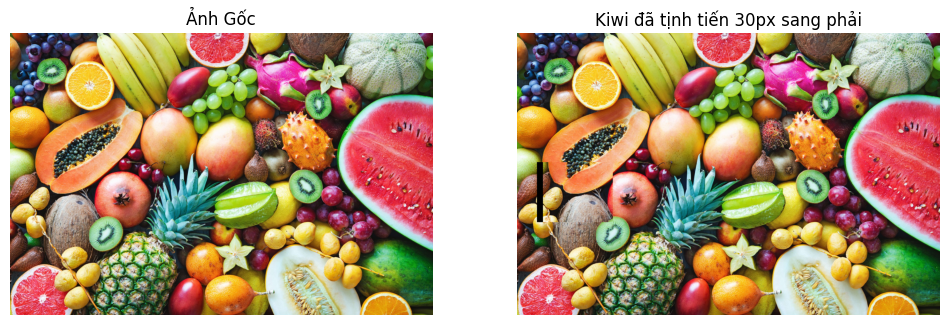

Đã lưu ảnh 'kiwi_translated.jpg' vào thư mục hiện tại.


In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import shift # Import shift cho tịnh tiến

# Đường dẫn đến ảnh
image_path = 'exercise/colorful-ripe-tropical-fruits.jpg'

try:
    # Đọc ảnh
    img = iio.imread(image_path)
    print(f"Kích thước ảnh gốc: {img.shape}")

    # --- Bước 1: Chọn quả kiwi ---
    # Giả sử tọa độ của quả kiwi (y_start:y_end, x_start:x_end)
    # CÁC GIÁ TRỊ NÀY LÀ GIẢ ĐỊNH! Bạn CẦN ĐIỀU CHỈNH chúng
    # bằng cách mở ảnh 'colorful-ripe-tropical-fruits.jpg' và xác định
    # vị trí của quả kiwi.
    # Ví dụ: Mở ảnh bằng Paint hoặc bất kỳ trình xem ảnh nào có hiển thị tọa độ
    # và tìm ra vùng chữ nhật bao quanh quả kiwi.
    
    # Ví dụ với ảnh "colorful-ripe-tropical-fruits.jpg" thường thấy:
    # Quả kiwi có thể nằm ở phía dưới bên trái của ảnh.
    # Mình sẽ đặt một khoảng tọa độ ước lượng:
    y_start, y_end = 650, 950   # Điều chỉnh nếu kiwi nằm ở vị trí khác
    x_start, x_end = 100, 450   # Điều chỉnh nếu kiwi nằm ở vị trí khác

    # Cắt vùng ảnh chứa quả kiwi
    kiwi_region = img[y_start:y_end, x_start:x_end]
    print(f"Kích thước quả kiwi đã chọn: {kiwi_region.shape}")

    # --- Bước 2: Tịnh tiến quả kiwi sang phải 30 pixels ---
    
    # Tạo một bản sao của ảnh gốc để không làm thay đổi ảnh ban đầu
    img_result_kiwi = np.copy(img)

    # **Xóa vùng kiwi cũ** (tùy chọn, nếu bạn muốn chỉ có 1 quả kiwi dịch chuyển)
    # Nếu không xóa, sẽ có 2 quả kiwi trên ảnh: 1 ở vị trí gốc và 1 ở vị trí mới.
    # Để xóa,có thể đặt vùng đó về màu đen (0) hoặc màu của nền xung quanh.
    # Đối với ảnh RGB (3 kênh), cần đặt cả 3 kênh về 0.
    img_result_kiwi[y_start:y_end, x_start:x_end] = 0 

    # Tính toán tọa độ mới cho quả kiwi sau khi tịnh tiến
    # Tịnh tiến sang phải 30 pixels, tức là tăng tọa độ x thêm 30.
    # Trục y (chiều cao) không đổi.
    new_y = y_start
    new_x = x_start + 30 # Tịnh tiến sang phải 30 pixels

    # Kiểm tra để đảm bảo quả kiwi không bị tràn ra ngoài biên ảnh sau khi dịch chuyển
    # new_y_end và new_x_end là tọa độ cuối cùng của vùng kiwi mới.
    # Chúng ta dùng min để đảm bảo không vượt quá kích thước của ảnh gốc.
    h_kiwi, w_kiwi, _ = kiwi_region.shape # Lấy chiều cao và chiều rộng của vùng kiwi đã cắt

    new_y_end = min(new_y + h_kiwi, img_result_kiwi.shape[0])
    new_x_end = min(new_x + w_kiwi, img_result_kiwi.shape[1])

    # Cắt lại vùng kiwi nếu sau khi dịch chuyển nó bị cắt bớt do vượt quá biên ảnh.
    # Điều này đảm bảo rằng kích thước của 'kiwi_to_paste_final' khớp với vùng dán.
    kiwi_to_paste_final = kiwi_region[:(new_y_end - new_y), :(new_x_end - new_x)]

    # Dán quả kiwi đã cắt và tịnh tiến vào ảnh kết quả tại vị trí mới
    img_result_kiwi[new_y:new_y_end, new_x:new_x_end] = kiwi_to_paste_final

    # Hiển thị ảnh gốc và ảnh kết quả
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Ảnh Gốc')
    plt.axis('off') # Ẩn các trục tọa độ

    plt.subplot(1, 2, 2)
    plt.imshow(img_result_kiwi)
    plt.title('Kiwi đã tịnh tiến 30px sang phải')
    plt.axis('off') # Ẩn các trục tọa độ

    plt.show()

    # Lưu ảnh kết quả
    iio.imwrite('kiwi_translated.jpg', img_result_kiwi)
    print("Đã lưu ảnh 'kiwi_translated.jpg' vào thư mục hiện tại.")

except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file ảnh tại đường dẫn {image_path}. Vui lòng kiểm tra lại đường dẫn và tên file.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

 # Câu 2 

Kích thước ảnh gốc: (1414, 2119, 3)


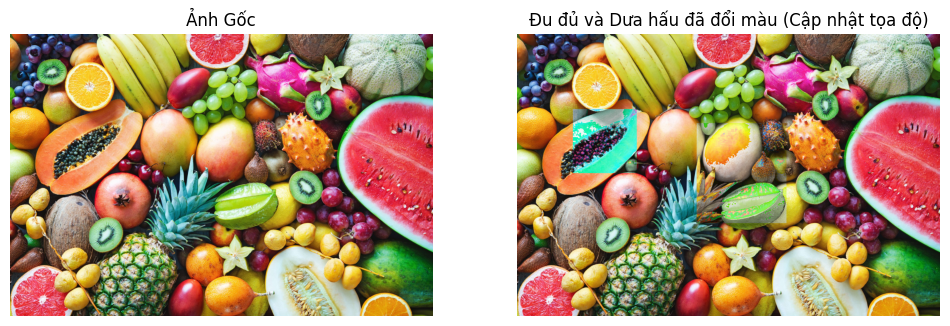

Đã lưu ảnh 'fruits_color_changed_final.jpg' vào thư mục hiện tại.


In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2 # Sử dụng OpenCV để dễ dàng chuyển đổi không gian màu HSV

# Đường dẫn đến ảnh
image_path = 'exercise/colorful-ripe-tropical-fruits.jpg'

try:
    # Đọc ảnh
    # imageio đọc ảnh theo định dạng RGB (Red, Green, Blue)
    img = iio.imread(image_path)
    print(f"Kích thước ảnh gốc: {img.shape}")

    # Tạo một bản sao của ảnh để thay đổi, tránh làm mất ảnh gốc
    img_modified = np.copy(img)

    # --- Bước 1: Chọn quả đu đủ và dưa hấu ---
    # CÁC GIÁ TRỊ TỌA ĐỘ ĐÃ ĐƯỢC CẬP NHẬT DỰA TRÊN ẢNH GỐC BẠN VỪA CUNG CẤP.

    # Vùng đu đủ (Papaya)
    papaya_y_start, papaya_y_end = 380, 700
    papaya_x_start, papaya_x_end = 280, 600

    # Vùng dưa hấu (Watermelon)
    watermelon_y_start, watermelon_y_end = 450, 950
    watermelon_x_start, watermelon_x_end = 900, 1350

    # --- Bước 2: Đổi màu hai đối tượng ---

    # Chuyển ảnh từ RGB (imageio) sang BGR (OpenCV)
    img_bgr = cv2.cvtColor(img_modified, cv2.COLOR_RGB2BGR)

    # ---------------------------------------
    # Xử lý đổi màu cho QUẢ ĐU ĐỦ
    # ---------------------------------------
    # Cắt vùng ảnh của đu đủ. Đảm bảo các chỉ số không vượt quá biên ảnh.
    papaya_region_bgr = img_bgr[papaya_y_start:min(papaya_y_end, img_bgr.shape[0]),
                                papaya_x_start:min(papaya_x_end, img_bgr.shape[1])]

    if papaya_region_bgr.size > 0: # Chỉ xử lý nếu vùng chọn không rỗng
        # Chuyển vùng đu đủ sang không gian màu HSV
        papaya_hsv = cv2.cvtColor(papaya_region_bgr, cv2.COLOR_BGR2HSV)

        # Thay đổi kênh Hue (màu sắc) của đu đủ.
        # Màu cam/vàng của đu đủ thường có Hue khoảng 10-30.
        # Để chuyển sang màu xanh lá cây đậm, dịch chuyển Hue khoảng +70
        papaya_hsv[:, :, 0] = (papaya_hsv[:, :, 0] + 70) % 180

        # Tăng độ bão hòa (Saturation) để màu sắc đậm hơn (ví dụ: +80)
        papaya_hsv[:, :, 1] = np.clip(papaya_hsv[:, :, 1] + 80, 0, 255)

        # Chuyển lại từ HSV về BGR
        papaya_modified_bgr = cv2.cvtColor(papaya_hsv, cv2.COLOR_HSV2BGR)

        # Dán vùng đu đủ đã đổi màu trở lại ảnh gốc
        img_bgr[papaya_y_start:papaya_y_start + papaya_modified_bgr.shape[0],
                papaya_x_start:papaya_x_start + papaya_modified_bgr.shape[1]] = papaya_modified_bgr
    else:
        print(f"Cảnh báo: Vùng chọn đu đủ rỗng hoặc không hợp lệ. y: {papaya_y_start}-{papaya_y_end}, x: {papaya_x_start}-{papaya_x_end}")


    # ---------------------------------------
    # Xử lý đổi màu cho QUẢ DƯA HẤU
    # ---------------------------------------
    # Cắt vùng ảnh của dưa hấu. Đảm bảo các chỉ số không vượt quá biên ảnh.
    watermelon_region_bgr = img_bgr[watermelon_y_start:min(watermelon_y_end, img_bgr.shape[0]),
                                    watermelon_x_start:min(watermelon_x_end, img_bgr.shape[1])]

    if watermelon_region_bgr.size > 0: # Chỉ xử lý nếu vùng chọn không rỗng
        # Chuyển vùng dưa hấu sang không gian màu HSV
        watermelon_hsv = cv2.cvtColor(watermelon_region_bgr, cv2.COLOR_BGR2HSV)

        # Thay đổi kênh Hue (màu sắc) của dưa hấu.
        # Màu xanh lá cây của dưa hấu thường có Hue khoảng 60-90.
        # Để chuyển sang màu đỏ tươi, dịch chuyển Hue khoảng -70 (hoặc +110)
        watermelon_hsv[:, :, 0] = (watermelon_hsv[:, :, 0] - 70) % 180

        # Tăng độ bão hòa để màu sắc nổi bật hơn (ví dụ: +100)
        watermelon_hsv[:, :, 1] = np.clip(watermelon_hsv[:, :, 1] + 100, 0, 255)


        # Chuyển lại từ HSV về BGR
        watermelon_modified_bgr = cv2.cvtColor(watermelon_hsv, cv2.COLOR_HSV2BGR)

        # Dán vùng dưa hấu đã đổi màu trở lại ảnh gốc
        img_bgr[watermelon_y_start:watermelon_y_start + watermelon_modified_bgr.shape[0],
                watermelon_x_start:watermelon_x_start + watermelon_modified_bgr.shape[1]] = watermelon_modified_bgr
    else:
        print(f"Cảnh báo: Vùng chọn dưa hấu rỗng hoặc không hợp lệ. y: {watermelon_y_start}-{watermelon_y_end}, x: {watermelon_x_start}-{watermelon_x_end}")


    # ---------------------------------------
    # Hiển thị và lưu kết quả
    # ---------------------------------------
    # Chuyển ảnh cuối cùng từ BGR sang RGB để hiển thị đúng với matplotlib
    img_result_color_changed = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Hiển thị ảnh gốc và ảnh kết quả
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Ảnh Gốc')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_result_color_changed)
    plt.title('Đu đủ và Dưa hấu đã đổi màu (Cập nhật tọa độ)')
    plt.axis('off')

    plt.show()

    # Lưu ảnh kết quả
    iio.imwrite('fruits_color_changed_final.jpg', img_result_color_changed)
    print("Đã lưu ảnh 'fruits_color_changed_final.jpg' vào thư mục hiện tại.")

except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file ảnh tại đường dẫn {image_path}. Vui lòng kiểm tra lại đường dẫn và tên file.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

# Câu 3 

Kích thước ảnh gốc: (605, 1021, 3)
Kích thước ngọn núi đã phóng to: (1000, 1000, 3)
Kích thước ngọn núi đã phóng to và xoay: (1414, 1414, 3)
Kích thước con thuyền đã phóng to: (500, 700, 3)
Kích thước con thuyền đã phóng to và xoay: (849, 849, 3)
Đã lưu ảnh 'mountain_zoomed_2x_rotated_45.jpg' vào thư mục hiện tại.
Đã lưu ảnh 'boat_zoomed_2x_rotated_45.jpg' vào thư mục hiện tại.


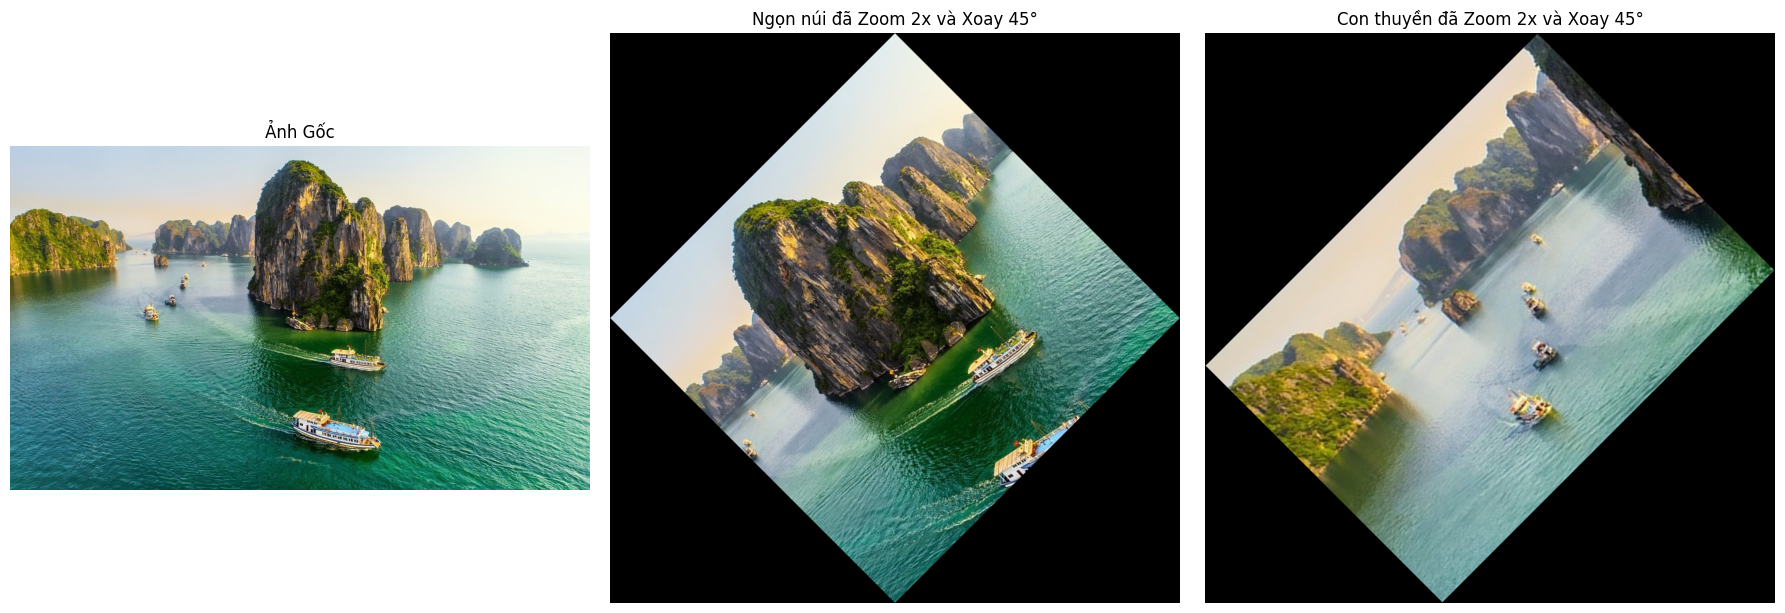

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, zoom # Import cả rotate và zoom

# Đường dẫn đến ảnh
image_path = 'exercise/quang_ninh.jpg'

try:
    # Đọc ảnh
    img = iio.imread(image_path)
    print(f"Kích thước ảnh gốc: {img.shape}")

    # --- Bước 1: Chọn ngọn núi và con thuyền ---
    # CÁC GIÁ TRỊ TỌA ĐỘ NÀY LÀ GIẢ ĐỊNH! VUI LÒNG ĐIỀU CHỈNH CHÚNG
    # Dựa trên ảnh 'quang_ninh.jpg' thực tế của bạn.

    # Vùng ngọn núi (ví dụ)
    # Giả định ngọn núi ở phía trên bên trái hoặc giữa ảnh
    mountain_y_start, mountain_y_end = 0, 500  # Điều chỉnh
    mountain_x_start, mountain_x_end = 300, 800 # Điều chỉnh

    # Vùng con thuyền (ví dụ)
    # Giả định con thuyền ở phía dưới bên trái hoặc giữa ảnh
    boat_y_start, boat_y_end = 100, 350  # Điều chỉnh
    boat_x_start, boat_x_end = 100, 450  # Điều chỉnh

    # Tham số cho phép biến đổi
    rotation_angle = 45 # Góc xoay 45 độ
    zoom_factor = 2     # Phóng to lên 2 lần. Bạn có thể thay đổi giá trị này.

    # ---------------------------------------
    # Xử lý cho NGỌN NÚI: Phóng to rồi Xoay
    # ---------------------------------------
    # Cắt vùng ảnh của ngọn núi. Đảm bảo các chỉ số không vượt quá biên ảnh.
    mountain_region = img[mountain_y_start:min(mountain_y_end, img.shape[0]),
                          mountain_x_start:min(mountain_x_end, img.shape[1])]

    if mountain_region.size > 0: # Chỉ xử lý nếu vùng chọn không rỗng
        # 1. Phóng to ngọn núi
        # (zoom_factor, zoom_factor, 1) vì đây là ảnh màu (3 kênh)
        zoomed_mountain = zoom(mountain_region, (zoom_factor, zoom_factor, 1), order=3)
        print(f"Kích thước ngọn núi đã phóng to: {zoomed_mountain.shape}")

        # 2. Xoay ngọn núi đã phóng to 45 độ
        rotated_zoomed_mountain = rotate(zoomed_mountain, angle=rotation_angle, reshape=True, mode='constant', cval=0)
        print(f"Kích thước ngọn núi đã phóng to và xoay: {rotated_zoomed_mountain.shape}")
    else:
        print(f"Cảnh báo: Vùng chọn ngọn núi rỗng hoặc không hợp lệ. y: {mountain_y_start}-{mountain_y_end}, x: {mountain_x_start}-{mountain_x_end}")
        rotated_zoomed_mountain = np.array([]) # Đặt rỗng nếu không có vùng

    # ---------------------------------------
    # Xử lý cho CON THUYỀN: Phóng to rồi Xoay
    # ---------------------------------------
    # Cắt vùng ảnh của con thuyền. Đảm bảo các chỉ số không vượt quá biên ảnh.
    boat_region = img[boat_y_start:min(boat_y_end, img.shape[0]),
                      boat_x_start:min(boat_x_end, img.shape[1])]

    if boat_region.size > 0: # Chỉ xử lý nếu vùng chọn không rỗng
        # 1. Phóng to con thuyền
        zoomed_boat = zoom(boat_region, (zoom_factor, zoom_factor, 1), order=3)
        print(f"Kích thước con thuyền đã phóng to: {zoomed_boat.shape}")

        # 2. Xoay con thuyền đã phóng to 45 độ
        rotated_zoomed_boat = rotate(zoomed_boat, angle=rotation_angle, reshape=True, mode='constant', cval=0)
        print(f"Kích thước con thuyền đã phóng to và xoay: {rotated_zoomed_boat.shape}")
    else:
        print(f"Cảnh báo: Vùng chọn con thuyền rỗng hoặc không hợp lệ. y: {boat_y_start}-{boat_y_end}, x: {boat_x_start}-{boat_x_end}")
        rotated_zoomed_boat = np.array([]) # Đặt rỗng nếu không có vùng

    # ---------------------------------------
    # Hiển thị và lưu kết quả
    # ---------------------------------------
    plt.figure(figsize=(18, 6)) # Tạo một figure để hiển thị 3 ảnh

    plt.subplot(1, 3, 1) # Subplot 1: Ảnh gốc
    plt.imshow(img)
    plt.title('Ảnh Gốc')
    plt.axis('off')

    if rotated_zoomed_mountain.size > 0:
        plt.subplot(1, 3, 2) # Subplot 2: Ngọn núi đã phóng to và xoay
        plt.imshow(rotated_zoomed_mountain)
        plt.title(f'Ngọn núi đã Zoom {zoom_factor}x và Xoay {rotation_angle}°')
        plt.axis('off')
        # Lưu ảnh ngọn núi đã xoay và phóng to
        iio.imwrite(f'mountain_zoomed_{zoom_factor}x_rotated_{rotation_angle}.jpg', rotated_zoomed_mountain)
        print(f"Đã lưu ảnh 'mountain_zoomed_{zoom_factor}x_rotated_{rotation_angle}.jpg' vào thư mục hiện tại.")
    else:
        plt.subplot(1, 3, 2)
        plt.text(0.5, 0.5, 'Không có núi để xử lý', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.title('Ngọn núi (Lỗi)')
        plt.axis('off')

    if rotated_zoomed_boat.size > 0:
        plt.subplot(1, 3, 3) # Subplot 3: Con thuyền đã phóng to và xoay
        plt.imshow(rotated_zoomed_boat)
        plt.title(f'Con thuyền đã Zoom {zoom_factor}x và Xoay {rotation_angle}°')
        plt.axis('off')
        # Lưu ảnh con thuyền đã xoay và phóng to
        iio.imwrite(f'boat_zoomed_{zoom_factor}x_rotated_{rotation_angle}.jpg', rotated_zoomed_boat)
        print(f"Đã lưu ảnh 'boat_zoomed_{zoom_factor}x_rotated_{rotation_angle}.jpg' vào thư mục hiện tại.")
    else:
        plt.subplot(1, 3, 3)
        plt.text(0.5, 0.5, 'Không có thuyền để xử lý', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.title('Con thuyền (Lỗi)')
        plt.axis('off')

    plt.tight_layout() # Điều chỉnh layout để tránh chồng lấn
    plt.show() # Hiển thị các subplot

except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file ảnh tại đường dẫn {image_path}. Vui lòng kiểm tra lại đường dẫn và tên file.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

# Câu 4

Kích thước ảnh gốc: (348, 600, 3)
Kích thước ngôi chùa đã tăng: (1240, 1000, 3)
Đã lưu ảnh 'pagoda_zoomed_5x_updated.jpg' vào thư mục hiện tại.


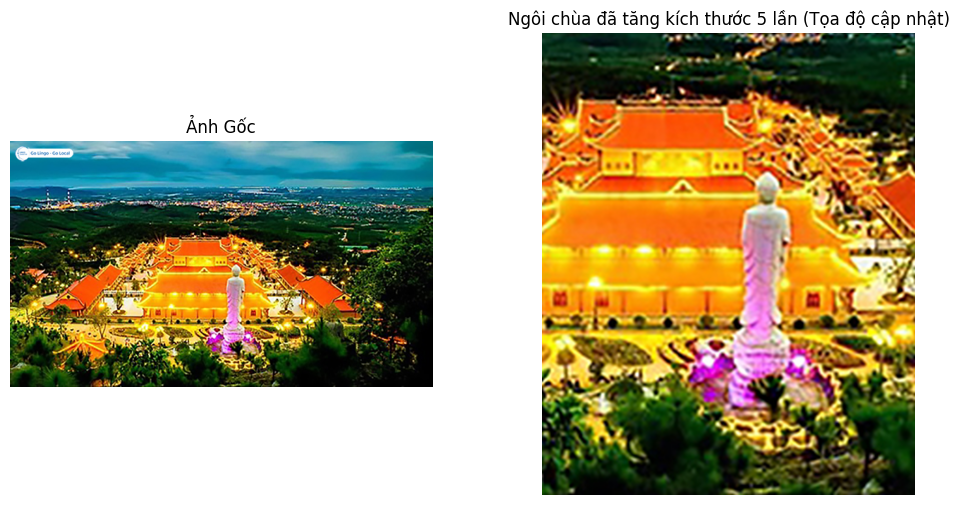

In [32]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Đường dẫn đến ảnh
image_path = 'exercise/pagoda.jpg' #

try:
    # Đọc ảnh
    img = iio.imread(image_path)
    print(f"Kích thước ảnh gốc: {img.shape}")

    # Tạo một bản sao của ảnh
    img_modified = np.copy(img)

    # --- Bước 1: Chọn ngôi chùa ---
    # CÁC GIÁ TRỊ TỌA ĐỘ NÀY ĐƯỢC CẬP NHẬT DỰA TRÊN ẢNH 'pagoda.jpg'
    # Đảm bảo bạn đã kiểm tra và điều chỉnh chúng cho phù hợp với ảnh của bạn.

    # Tọa độ cho ngôi chùa trong ảnh 'pagoda.jpg'
    pagoda_y_start, pagoda_y_end = 100, 400 # Điều chỉnh y_start thấp hơn và y_end cao hơn
    pagoda_x_start, pagoda_x_end = 200, 400 # Điều chỉnh x_start thấp hơn và x_end cao hơn

    zoom_factor = 5

    # Cắt vùng ảnh của ngôi chùa.
    pagoda_region = img[pagoda_y_start:min(pagoda_y_end, img.shape[0]),
                        pagoda_x_start:min(pagoda_x_end, img.shape[1])]

    if pagoda_region.size > 0:
        zoomed_pagoda = zoom(pagoda_region, (zoom_factor, zoom_factor, 1), order=3)
        print(f"Kích thước ngôi chùa đã tăng: {zoomed_pagoda.shape}")
    else:
        print(f"Cảnh báo: Vùng chọn ngôi chùa rỗng hoặc không hợp lệ. y: {pagoda_y_start}-{pagoda_y_end}, x: {pagoda_x_start}-{pagoda_x_end}")
        zoomed_pagoda = np.array([])

    # ---------------------------------------
    # Hiển thị và Lưu Kết quả
    # ---------------------------------------
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Ảnh Gốc')
    plt.axis('off')

    if zoomed_pagoda.size > 0:
        plt.subplot(1, 2, 2)
        plt.imshow(zoomed_pagoda)
        plt.title(f'Ngôi chùa đã tăng kích thước {zoom_factor} lần (Tọa độ cập nhật)')
        plt.axis('off')
        iio.imwrite(f'pagoda_zoomed_{zoom_factor}x_updated.jpg', zoomed_pagoda)
        print(f"Đã lưu ảnh 'pagoda_zoomed_{zoom_factor}x_updated.jpg' vào thư mục hiện tại.")
    else:
        plt.subplot(1, 2, 2)
        plt.text(0.5, 0.5, 'Không có chùa để xử lý', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.title('Ngôi chùa (Lỗi)')
        plt.axis('off')

    plt.show()

except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file ảnh tại đường dẫn {image_path}. Vui lòng kiểm tra lại đường dẫn và tên file.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")